In [141]:
#to suppress sklearn package warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [146]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#downloading MNIST dataset provided by sklearn package
mnist_data = fetch_openml('mnist_784')
X,y = mnist_data["data"], mnist_data["target"]
print(mnist_data.keys())
print(X.shape,y.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])
(70000, 784) (70000,)


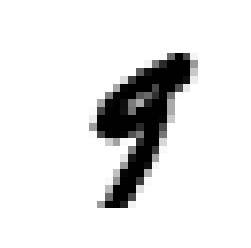

9


In [26]:
#matplotlib's imshow() can be used to display an image i.e data on a 2D regular raster
%matplotlib inline
some_digit = X[36000] #randomly picking a digit
some_digit_im = some_digit.reshape(28,28) #reshaping the pixel intensity vector into a 28*28 array
# interpolation="nearest" - displays an image without trying to interpolate between pixels if the display resolution is not the same as image resolution
# It will result an image in which pixels are displayed as a square of multiple pixels.
plt.imshow(some_digit_im, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(y[36000])

In [43]:
#splitting dataset into 60000 training points and 10000 test points
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [44]:
#shuffling the training dataset randomly so it would work well during CV
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [45]:
######################### Training a binary classifier -> 5-detector i.e to identify only digit 5 ######################

In [46]:
#changing the labels to indicate True = '5' and False=anything else
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [48]:
#initiating and fitting a SGD classifier model
#setting random state parameter to get reproducible results
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
###################### Implementing Stratified kfold CV ############################ 

In [51]:
#initiating StratifiedKFold splits. Splitting the entire training set (60k points) into 3 folds
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

In [62]:
#train_index = 2 folds, test_index = 1 fold
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) #copying the SGD classifier model
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    #fitting SGD classifier on training folds
    clone_clf.fit(X_train_folds, y_train_folds)
    #predicting the testing fold
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred)) #accuracy i.e number of correctly classified points/total points

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.957


/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9665


/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9653


In [54]:
################### Computing confusin matrices based on kfold CV ######################

In [56]:
#cross_val_precict performs k-fold cross-validation and returns the predictions made on each fold.(3 folds = 3*20000 = 60000 predictions)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been add

In [63]:
confusion_matrix(y_train_5, y_train_pred)

array([[53775,   804],
       [ 1420,  4001]])

In [65]:
#computing precision and recall on the training sample predictions
pscore = precision_score(y_train_5, y_train_pred)
rscore = recall_score(y_train_5,y_train_pred)
print(pscore,rscore)

0.8326742976066597 0.7380557092787309


In [66]:
#################### Plotting Precision Recall curve of predictions on training dataset ######################

In [92]:
#this function plots the precision-recall curve over a given range of threholds
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])

In [67]:
#getting the prediction scores from the SGDClassifier instead of predicted labels
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been add

In [74]:
#precision_recall_curve() returns precisions and recalls using a range of thresholds of scores
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

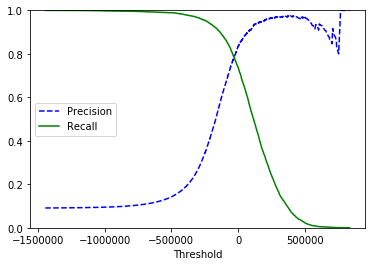

In [93]:
plot_precision_recall(precisions, recalls, thresholds)
plt.show()

In [94]:
#################### Plotting the ROC curve on predictions on training dataset ######################

In [104]:
#this function plots the ROC curve given the set of fprs and tprs for a given range of thresholds
def plot_roc_curve(fpr, tpr, label = None):
    #plotting the ROC curve
    plt.plot(fpr, tpr, linewidth = 2, label=label)
    #plotting the dotted straight line -> random classifier
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [105]:
#roc_curve() returns the fpr and tpr using a range of thresholds of scores
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

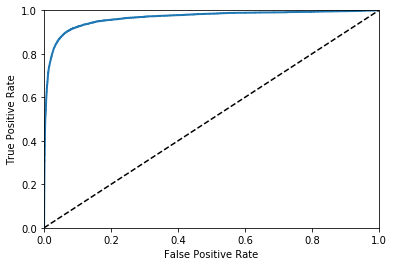

In [106]:
#plotting the ROC curve
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

In [130]:
print(roc_auc_score(y_train_5,y_scores))

0.965503573108601


In [107]:
################# Training a RandomForestClassifier to compare with the SGD Classifier ###############

In [109]:
#initiating the random forest classifier
forest_clf = RandomForestClassifier(random_state=42)

In [110]:
#fitting the data and retrieving the prediction probabilities for each instance for each class using 3-fold CV
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


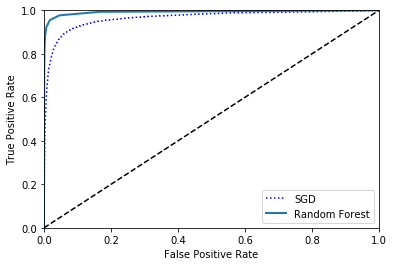

In [127]:
#plotting ROC curve using the probabilities of positive class(i.e a "5")
y_scores_forest = y_probs_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD") #plotting SGD ROC
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [131]:
print(roc_auc_score(y_train_5,y_scores_forest))

0.9927467350922969


In [132]:
################## Multi-class SGD classifier with OVA (one versus all) strategy ####################
# OVA(One-versus-all) - a binary classifier for each class (selected class = 1, all other classes = 0) => n+1 classifiers where n = num of categories
# OVO(One-versus-other) - a binary classifier for every pair of class levels => n(n-1)/2 classifiers where n= num of categories

In [133]:
#fitting SGD classifier on the full training dataset => multiclass classification
sgd_clf.fit(X_train, y_train)

/Users/ghai7c/anaconda3/envs/ML_practise/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [134]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [137]:
################## Implementing OVO SGD classifier using OneVsOneClassifier class ####################
# Create an instance of OneVsOneClassifier and pass a binary classifier to its constructor

In [140]:
#creating an instance of ovo class
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
#fitting the entire training dataset
ovo_clf.fit(X_train, y_train)
print(len(ovo_clf.estimators_))

45


In [145]:
#evaluating using CV
cross_val_score(sgd_clf,X_train, y_train, cv=3,scoring="accuracy")

array([0.85867826, 0.8719436 , 0.87063059])

In [149]:
#fitting the standardized (Scaled) training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90946811, 0.91234562, 0.90678602])